In [24]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
file_path = Path('Data/myopia.csv')

In [3]:
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
df.nunique()

AGE            5
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
MYOPIC         2
dtype: int64

In [5]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [6]:
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [7]:
X = df.drop(['MYOPIC'], axis=1)
y = df['MYOPIC']


In [8]:
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [10]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
iris_pca = pca.fit_transform(X)

In [11]:
df_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"]
)
df_pca.head()

,principal component 1,principal component 2
0,12.138059,31.636212
1,-15.268363,-6.095695
2,-11.662239,3.755105
3,11.235886,4.012566
4,-22.446506,4.580916


In [12]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72557249, 0.16081428])

In [13]:
pca = PCA(n_components=0.95)
pca_transformed_data = pca.fit_transform(scaled_data)

In [14]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

/Users/og/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [15]:
transformed_features.shape

(618, 2)

In [16]:
X["x"] = transformed_features[:,0]
X["y"] = transformed_features[:,1]


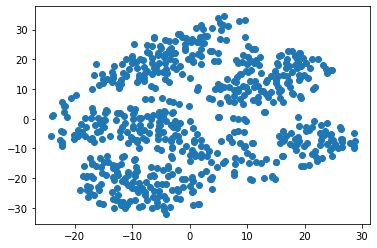

In [17]:
plt.scatter(X["x"], X["y"])
plt.show()

In [18]:
X.value_counts()

AGE  SPHEQ   AL         ACD    LT     VCD    SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  x           y         
5    -0.129  22.940001  3.836  3.252  15.85  20       0       0       0        4     4          1      0      -18.221937   0.174467     1
6     1.362  21.799999  3.410  4.112  14.27  15       0       2       0        6     10         1      0       6.390163    26.563938    1
      1.332  21.760000  3.198  3.668  14.89  20       3       2       1        10    26         1      0      -3.080616   -6.568616     1
      1.334  21.820000  3.436  3.612  14.77  8        2       1       2        3     17         1      1      -4.499202   -25.990181    1
      1.340  21.200001  3.330  3.266  14.60  20       0       1       0        10    12         1      1      -4.181268   -21.845053    1
                                                                                                                                       ..
      0.681  22.540001  3.582  3.752  1

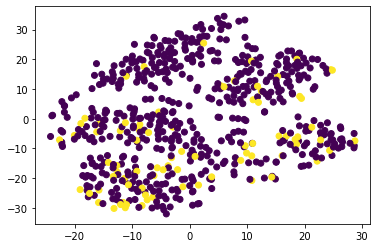

In [21]:
# Visualize the clusters with color
plt.scatter(X['x'], X['y'], c=y)
plt.show()

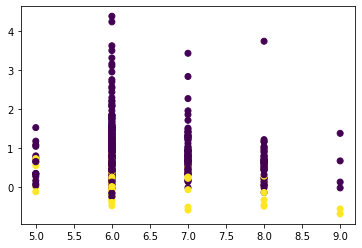

In [23]:
plt.scatter(df['AGE'], df['SPHEQ'], c=y)
plt.show()

In [25]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,234077.487563
1,2,126281.996310
2,3,93178.921127
3,4,78306.115708
4,5,67315.950891


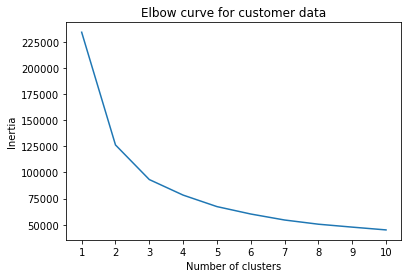

In [26]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()